# Hierarchical KMeans
Hierarchical KMeans gồm 2 thuật toán là agglomerative clustering and divisive clustering:
* Agglomerative clustering: Đây là cách tiếp cận bottom-up. Tức là coi mỗi sample như là một cluster sau đó tiến hành bắt cặp các cụm và gom lại cứ thế tuần tự
* Divisive clustering: Đây là cách tiếp cận top-down. Ban đầu coi tất cả samples đều chung 1 cluster. Sau đó split chúng theo từng tự.

Ở bài thực hành này chúng ta sẽ tiến hành khảo sát thuật toán agglomerative clustering với các linkage distances của 2 cụm như:
* Ward
* Complete
* Single
* Average

Ở phần demo chúng ta sẽ nhìn sơ qua về hiệu quả của từng loại distance

In [1]:
print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

import numpy as np            
import pandas as pd 

X, y = datasets.load_digits(return_X_y=True)

Automatically created module for IPython interactive environment


đây là bộ dữ liệu tập hợp các ảnh chứa các số từ 0 đến 9

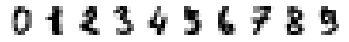

In [2]:
#in thử 10 ảnh ra
images_and_labels = list(zip(X, y))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

In [3]:
# Không cần quan tâm đoạn này lắm
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Computing embedding
Done.
ward :	0.07s
average :	0.05s
complete :	0.06s
single :	0.03s


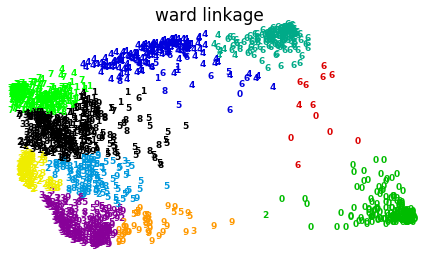

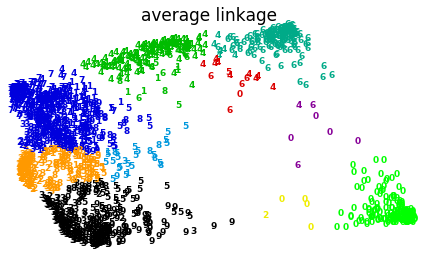

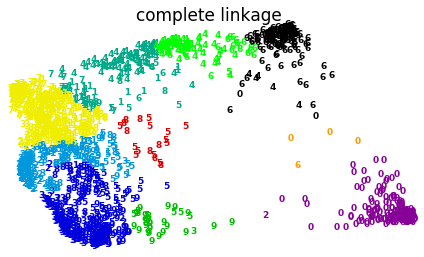

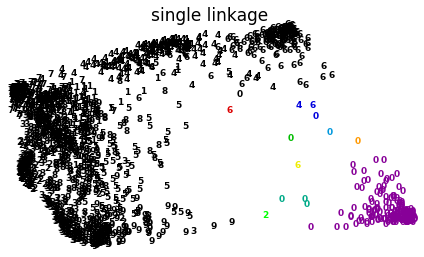

In [4]:
#agglomerative clustering 
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X) #convert vector có 64 componets về vector có 2 components
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10) #Chọn 10 cụm vì thức chất data ở đây có 10
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

# Bài Tập

1. Dùng thư viện sch.dendrogram để vẽ ra dendrogram chọn ra số cụm thích hợp và dùng hierachical kmeans để gom cụm lại.
2. Vẽ hình biểu diễn các cụm
* Lưu ý dùng cả 4 distances ở trên

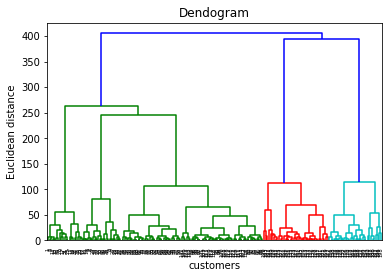

In [5]:
# import the datset
dataset = pd.read_csv('https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-06/bt1.csv')
X = dataset.iloc[:,[3,4]].values
import scipy.cluster.hierarchy as sch
# make a dendogram used ward method 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('Euclidean distance')
plt.show()

#Từ đây hãy chọn só cụm thích hơp và phân cụm bằng thuật toán agglomerative clustering

# Bài làm

Vẽ 4 Dendrogram tương ứng 4 linkage methods: ('ward', 'average', 'complete', 'single')

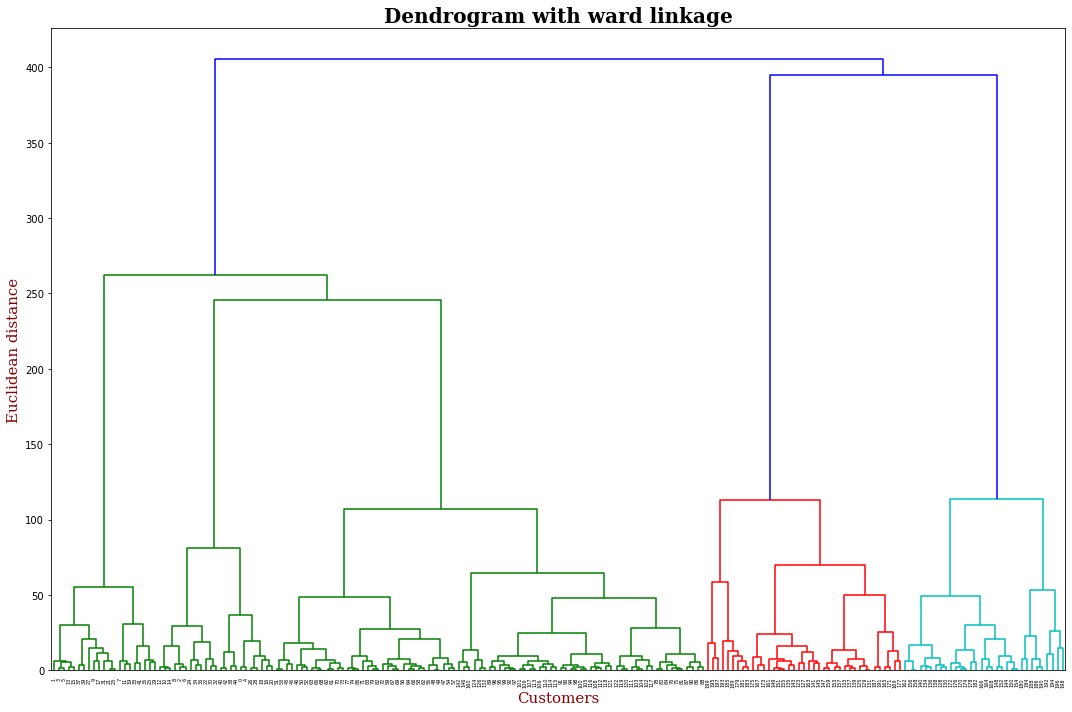

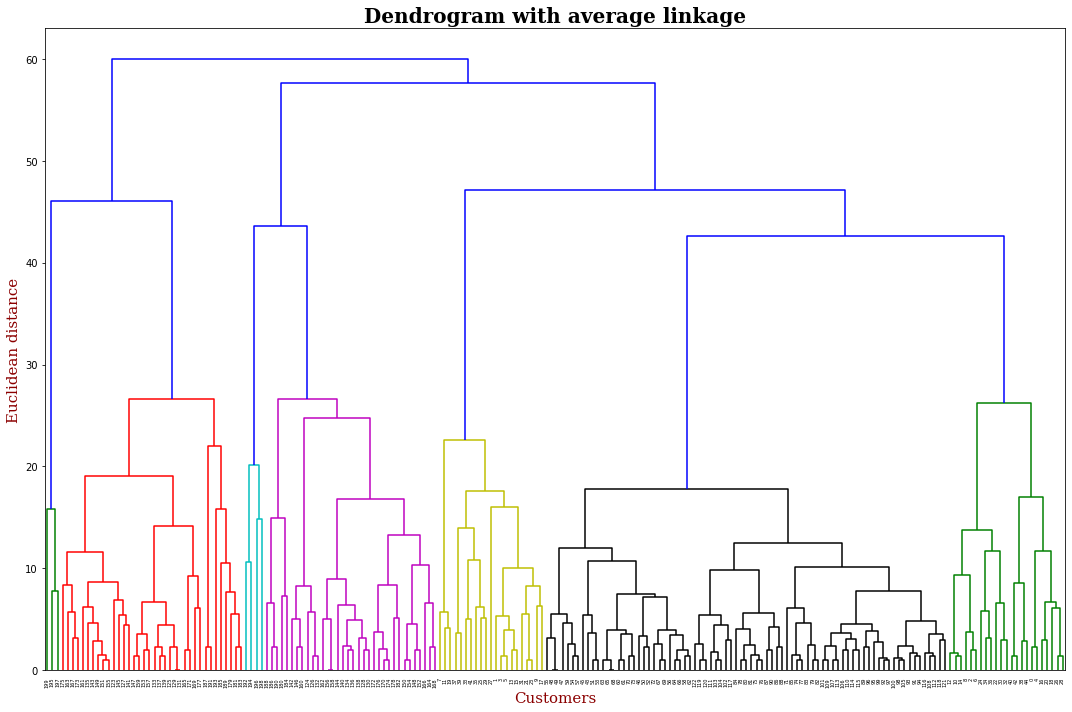

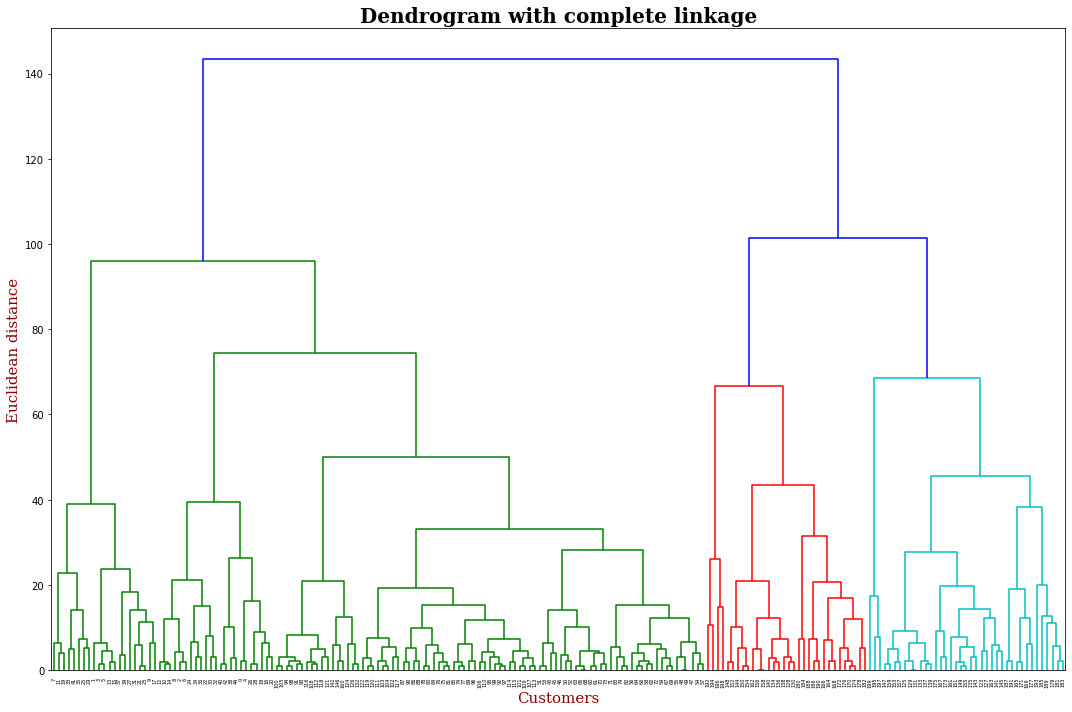

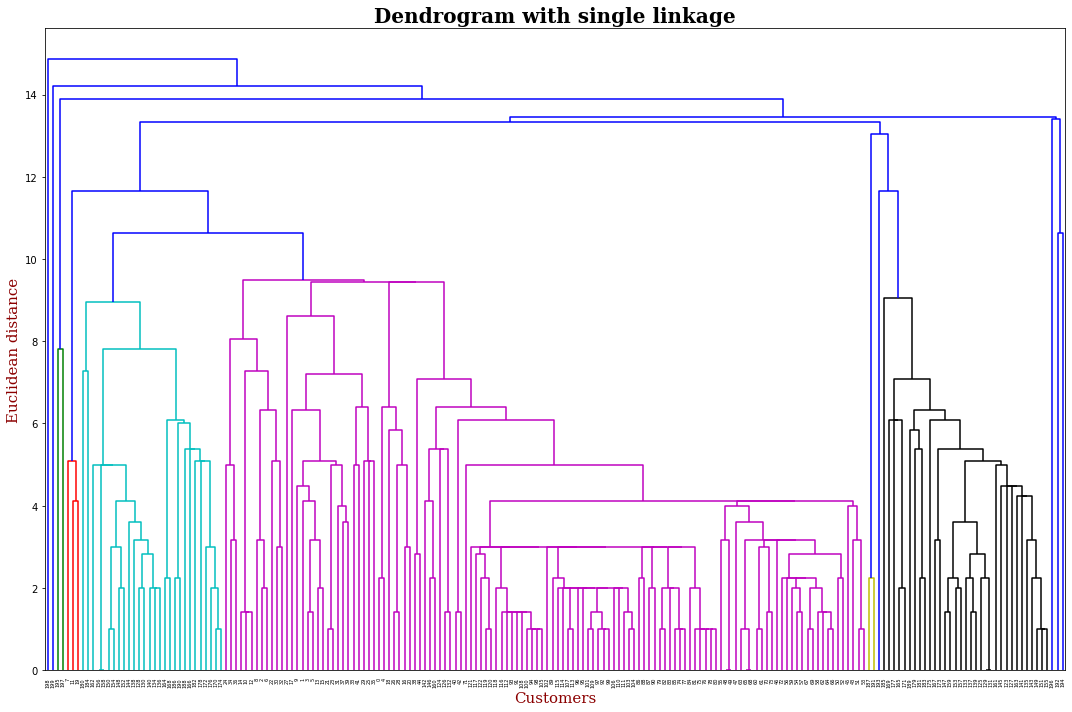

In [6]:
import scipy.cluster.hierarchy as sch

font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

font2 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }


for d_method in ('ward', 'average', 'complete', 'single'):
    plt.figure(figsize=(15,10))
    dendrogram = sch.dendrogram(sch.linkage(X, method = d_method))

    plt.title('Dendrogram with ' + d_method + ' linkage', fontdict=font1)
    plt.xlabel('Customers', fontdict=font2)
    plt.ylabel('Euclidean distance', fontdict=font2)
    plt.tight_layout()

plt.show()

Từ Dendrogam đã có, vẽ thêm đường ngang dựa trên khoảng cách để tìm số cụm:

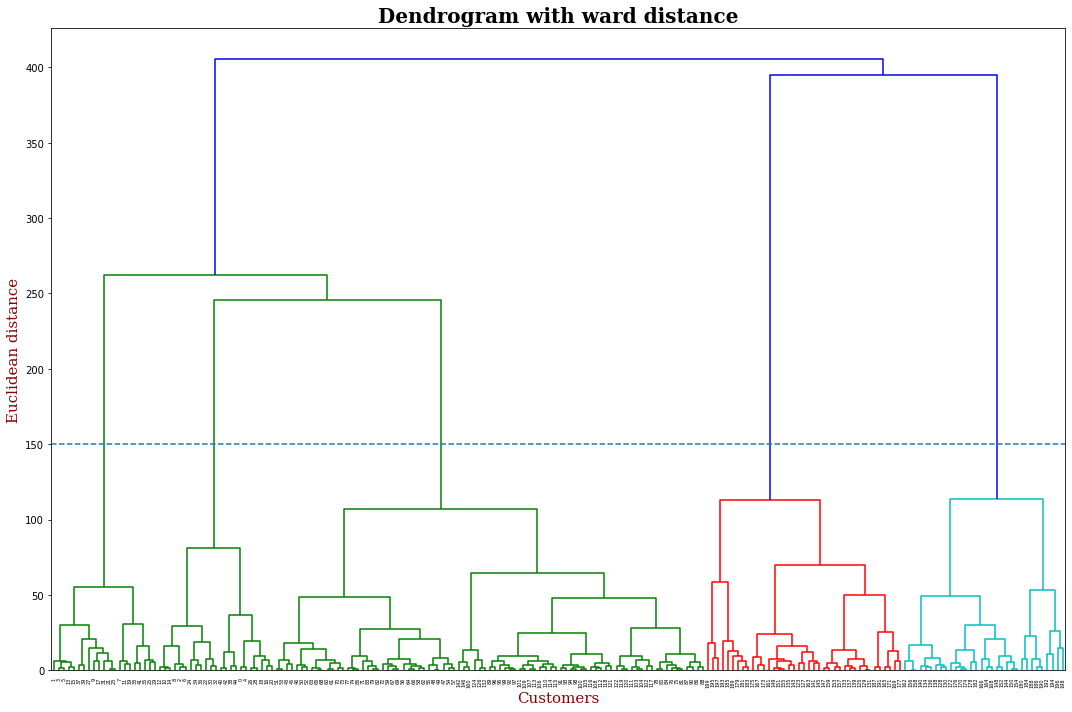

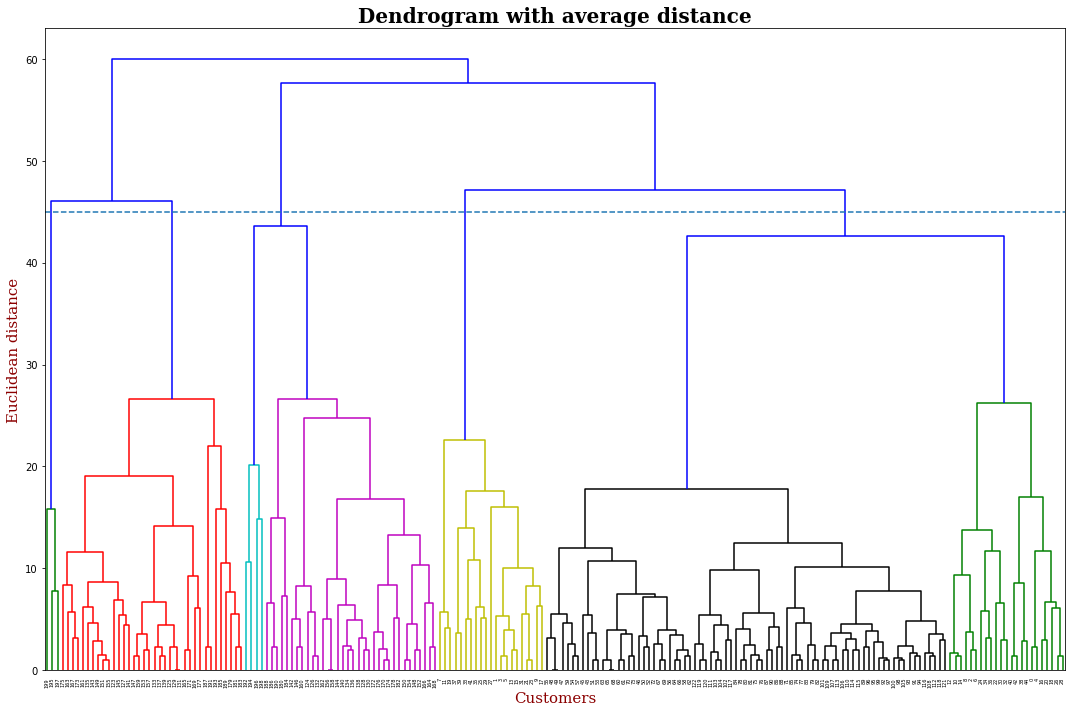

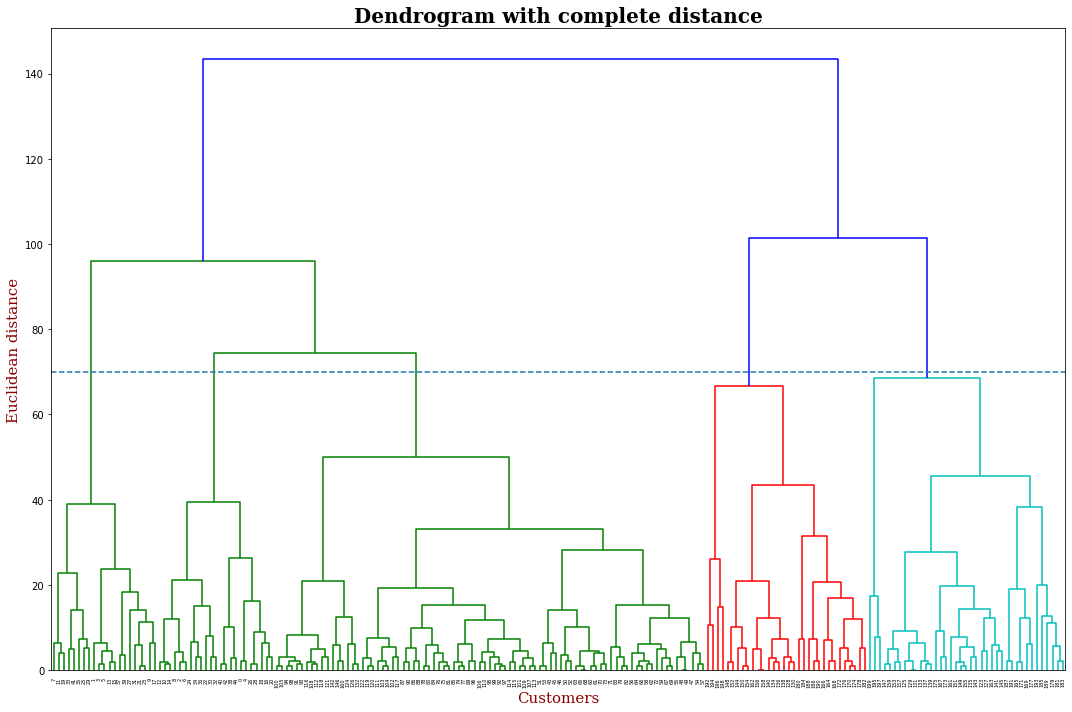

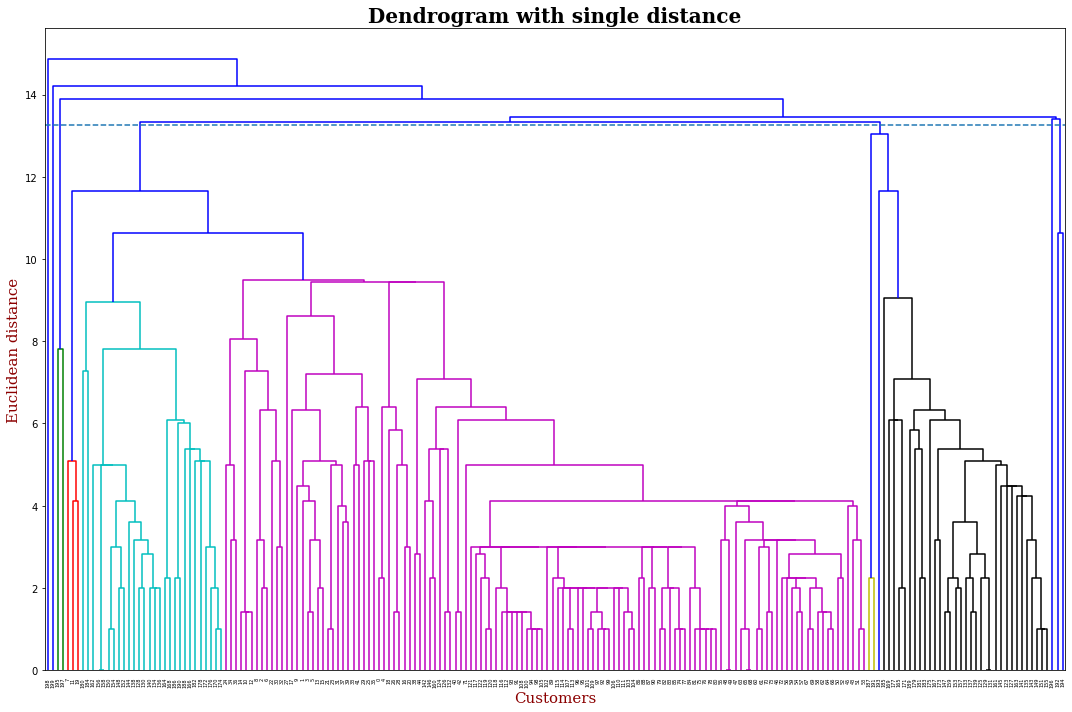

In [7]:
import scipy.cluster.hierarchy as sch

font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

font2 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }

horizontal_line = (150, 45, 70, 13.25)

for d_method, h_line in zip(('ward', 'average', 'complete', 'single'),horizontal_line):
    plt.figure(figsize=(15,10))
    dendrogram = sch.dendrogram(sch.linkage(X, method = d_method))
    
    plt.axhline(y=h_line,linestyle='--')
    
    plt.title('Dendrogram with ' + d_method + ' distance', fontdict=font1)
    plt.xlabel('Customers', fontdict=font2)
    plt.ylabel('Euclidean distance', fontdict=font2)
    plt.tight_layout()

plt.show()

Ta có số cụm lần lượt là (5, 5, 5, 7) ứng với 4 linkages ('ward', 'average', 'complete', 'single')

Nên ta vẽ phân cụm như sau:

ward :	0.00s
average :	0.00s
complete :	0.00s
single :	0.00s


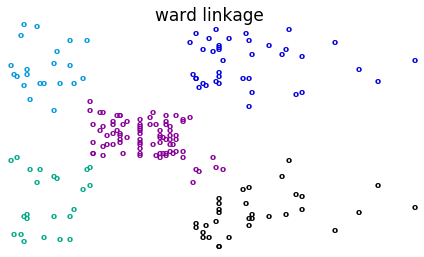

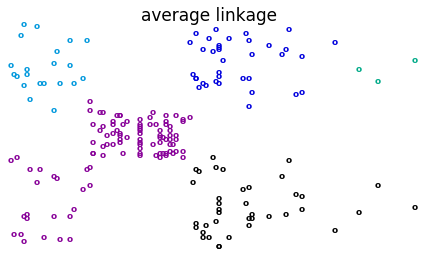

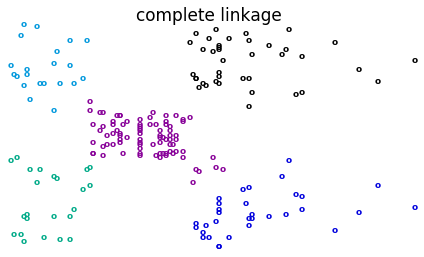

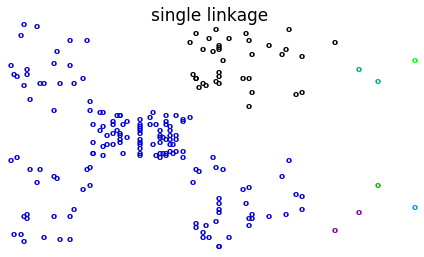

In [10]:
#agglomerative clustering 
from sklearn.cluster import AgglomerativeClustering
no_clusters = (5, 5, 5, 7) 
linkages = ('ward', 'average', 'complete', 'single')

#Vì data không có label như bộ digit, ta có biểu diễn mỗi sample bằng 'o'
y = ['o']*len(X)

for clusters, linkage in list(zip(no_clusters, linkages)):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=clusters)
    t0 = time()
    clustering.fit(X)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X, clustering.labels_, "%s linkage" % linkage)

plt.show()

Nhận xét:

Trực quan hình dạng dữ liệu ta thấy ward và complete linkages là 2 method cho kết quả phân cụm tốt nhất dựa trên 2 features(Annual Income và Spending Score) đối với bộ dữ liệu khách hàng này.